# Performing Text Mining data analysis

In [66]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans


from wordcloud import WordCloud, STOPWORDS

In [30]:
data = pd.read_csv('./listings.csv')
data.shape

/home/raviranjan0631/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(83850, 106)

In [31]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [32]:
data = data.dropna(subset=['space', 'summary'])
data.shape

(56389, 106)

**Note**
Since I have 3gb of RAM so I am performing the operation on 10K of data

In [33]:
data = data[:10000]
data.shape

(10000, 106)

In [34]:
data = data.dropna(subset=['space', 'summary'])
data.shape

(10000, 106)

In [42]:
space_summary = []
for i in range(0,10000):
    sent = ''
    sent = data.space.values[i] + " " + data.summary.values[i]
    space_summary.append(sent)
data["space_summary"] = space_summary
data.space_summary.head()

0    Hello Everyone, I'm offering my lovely double ...
1    Bright Chelsea Apartment  This is a bright one...
2    Ready again from June 2018 for bookings after ...
3    - End of terrace two bedroom house close to So...
4    10 mins walk to Southfields tube and Wimbledon...
Name: space_summary, dtype: object

## Text Preprocessing: Stemming, stop-word removal and Lemmatization.

Hence in the Preprocessing phase we do the following in the order below:-

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming

In [43]:
import re
i=0;
for sent in data['space_summary'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

In [48]:
nltk.download('stopwords')
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/raviranjan0631/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'which', 'while', 'mustn', 'had', 'to', 'below', 'does', 'other', 'any', 'herself', 'so', 'in', 'both', 'by', 'these', 'once', "wouldn't", 'doing', 'll', 'hadn', "that'll", "should've", 'over', "weren't", 'own', 'a', 'very', "mustn't", 'wouldn', 'i', "shan't", 'from', 'its', 'my', 's', 'how', 'because', 'couldn', 'don', 'didn', 'shouldn', 'doesn', "you've", 'can', 'needn', 'he', 'is', "haven't", 'just', 'ain', 'above', 'y', 'her', "don't", 'are', 're', 'aren', 'again', 'was', 'such', 'some', 'into', 'himself', 'now', "needn't", 'but', "you'd", 'their', 'between', 'not', 'am', 'won', 'the', 'having', 'itself', "didn't", 'when', 'isn', 'under', 'haven', 'that', 'myself', 'with', 'she', 'has', 'nor', 'than', 'who', 'at', "aren't", 'for', 'been', 'on', 'more', "couldn't", 'were', 'they', "it's", 'further', "wasn't", 'weren', "shouldn't", 'me

In [49]:
# this code takes a while to run as it needs to run on 10k sentences.
i=0
str1=' '
final_string=[]
s=''
for sent in data['space_summary'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [50]:
data['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
data['CleanedText']=data['CleanedText'].str.decode("utf-8")
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,space_summary,CleanedText
0,13913,https://www.airbnb.com/rooms/13913,20190710134553,2019-07-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,...,moderate,f,f,3,1,2,0,0.15,"Hello Everyone, I'm offering my lovely double ...",hello everyon offer love doubl bedroom finsbur...
1,15400,https://www.airbnb.com/rooms/15400,20190710134553,2019-07-11,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,...,strict_14_with_grace_period,t,t,1,1,0,0,0.73,Bright Chelsea Apartment This is a bright one...,bright chelsea apart bright one bedroom ground...
2,17402,https://www.airbnb.com/rooms/17402,20190710134553,2019-07-11,Superb 3-Bed/2 Bath & Wifi: Trendy W1,"Open from June 2018 after a 3-year break, we a...",Ready again from June 2018 for bookings after ...,"Open from June 2018 after a 3-year break, we a...",none,"Location, location, location! You won't find b...",...,strict_14_with_grace_period,f,f,14,14,0,0,0.41,Ready again from June 2018 for bookings after ...,readi june book break full refurb excit welcom...
3,24328,https://www.airbnb.com/rooms/24328,20190710134553,2019-07-11,Battersea bedroom & office w parking shared ga...,"Artist house, bright high ceiling rooms, priva...",- End of terrace two bedroom house close to So...,"Artist house, bright high ceiling rooms, priva...",family,"- Battersea is a quiet family area, easy acces...",...,moderate,t,t,1,1,0,0,0.88,- End of terrace two bedroom house close to So...,end terrac two bedroom hous close southwest co...
4,25023,https://www.airbnb.com/rooms/25023,20190710134553,2019-07-11,All-comforts 2-bed flat near Wimbledon tennis,"Large, all comforts, 2-bed flat; first floor; ...",10 mins walk to Southfields tube and Wimbledon...,"Large, all comforts, 2-bed flat; first floor; ...",none,This is a leafy residential area with excellen...,...,moderate,f,f,1,1,0,0,0.69,10 mins walk to Southfields tube and Wimbledon...,min walk southfield tube wimbledon tenni flat ...


In [51]:
data['CleanedText'].head()

0    hello everyon offer love doubl bedroom finsbur...
1    bright chelsea apart bright one bedroom ground...
2    readi june book break full refurb excit welcom...
3    end terrac two bedroom hous close southwest co...
4    min walk southfield tube wimbledon tenni flat ...
Name: CleanedText, dtype: object

## TF-IDF operation

In [53]:
## TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1,2),min_df = 10)
tf_kmeans = tf_idf.fit_transform(data['CleanedText'].values)
print('The kmeans shape of data is ',tf_kmeans.shape)

The kmeans shape of data is  (10000, 14571)


In [59]:

def kmeans1(data):
    k = [3, 4, 5, 6, 7, 8, 9, 11, 13, 15, 17]
    inertia = []
    for i in k:
        kmeans = KMeans(n_clusters=i, init='k-means++')
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        
    return inertia , k


def inertiaPlot(inertia, k):
    plt.plot(k, inertia)
    plt.xlabel("k")
    plt.ylabel("inertia")
    plt.title("elbow knee method")
    plt.show()
    

def word_cloud_per_cluster(train, model, trainData):
    pred_labels = model.labels_
    words_clusterwise = []
    count = 0
    for label in np.unique(model.labels_):
        for i in range(train.shape[0]):
            if label == pred_labels[i] and count < 50:
                count += 1
                words_clusterwise = [trainData[i].split() ]
            if count == 50:
                    break
        wordcloud = WordCloud(width = 800, height = 800,
                    max_words = 150,
                    background_color = 'black',
                    stopwords = None,
                    min_font_size = 10).generate(str(words_clusterwise))
        words_clusterwise = []
        count = 0
        print(words_clusterwise)
        plt.figure(figsize = (5,5), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.tight_layout(pad = 0)
        plt.title("Cluster " + str(label))

        plt.show()

In [60]:
i, k = kmeans1(tf_kmeans)

## Elbow Knee method

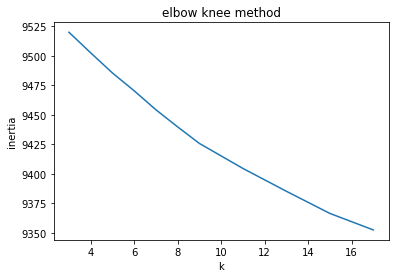

In [61]:
inertiaPlot(i, k)

In [62]:
print('done')

done


In [63]:
model1 = KMeans(n_clusters=9, init='k-means++')
model1.fit(tf_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[]


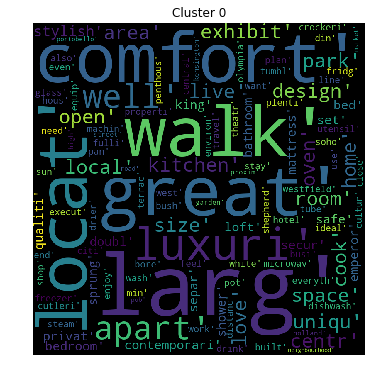

[]


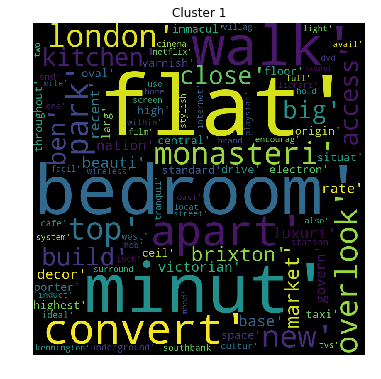

[]


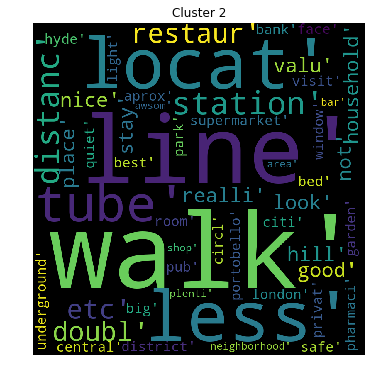

[]


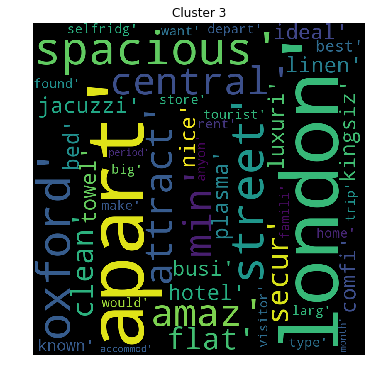

[]


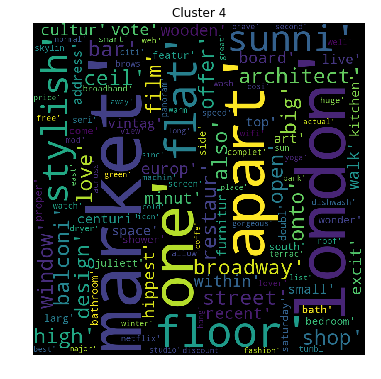

[]


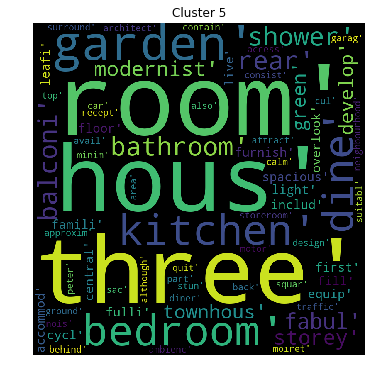

[]


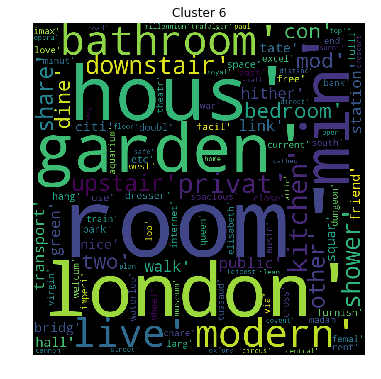

[]


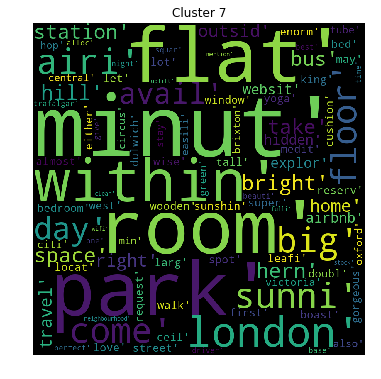

[]


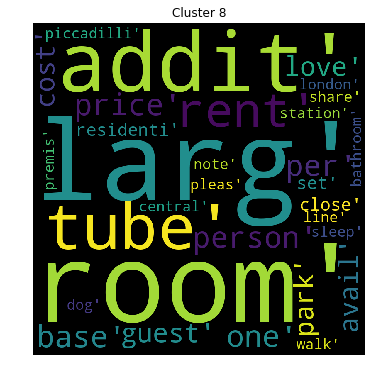

In [67]:
word_cloud_per_cluster(tf_kmeans, model1, data['CleanedText'].values)